In [20]:
# === Step 1: Import Libraries ===
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_score, recall_score, f1_score, roc_auc_score

from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

In [21]:
# Load CSV
df = pd.read_csv("C:\Hepatitis C prediction\HepatitisCdata.csv")
df.drop(columns=["Unnamed: 0"], inplace=True)
# Initial overview
print(df.shape)
print(df.info())
print(df.isnull().sum())



category_counts = df['Category'].value_counts()
print("Number of unique categories:", category_counts.shape[0])
print("\nCounts for each category:\n", category_counts)

(615, 13)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 615 entries, 0 to 614
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Category  615 non-null    object 
 1   Age       615 non-null    int64  
 2   Sex       615 non-null    object 
 3   ALB       614 non-null    float64
 4   ALP       597 non-null    float64
 5   ALT       614 non-null    float64
 6   AST       615 non-null    float64
 7   BIL       615 non-null    float64
 8   CHE       615 non-null    float64
 9   CHOL      605 non-null    float64
 10  CREA      615 non-null    float64
 11  GGT       615 non-null    float64
 12  PROT      614 non-null    float64
dtypes: float64(10), int64(1), object(2)
memory usage: 62.6+ KB
None
Category     0
Age          0
Sex          0
ALB          1
ALP         18
ALT          1
AST          0
BIL          0
CHE          0
CHOL        10
CREA         0
GGT          0
PROT         1
dtype: int64
Number of unique catego

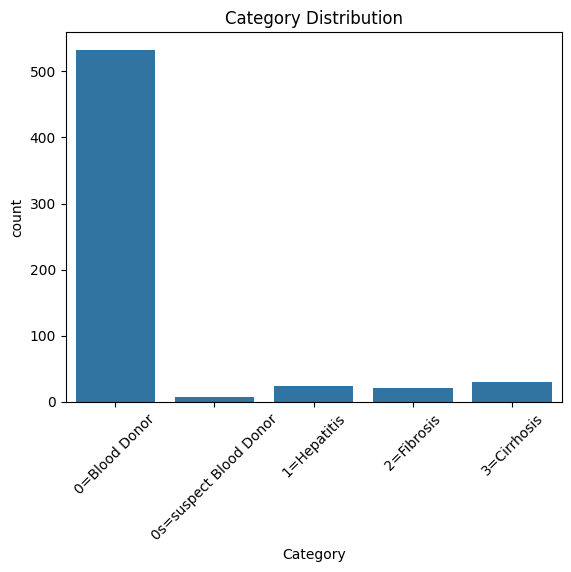

In [22]:
# Target distribution
sns.countplot(data=df, x='Category')
plt.title("Category Distribution")
plt.xticks(rotation=45)
plt.show()

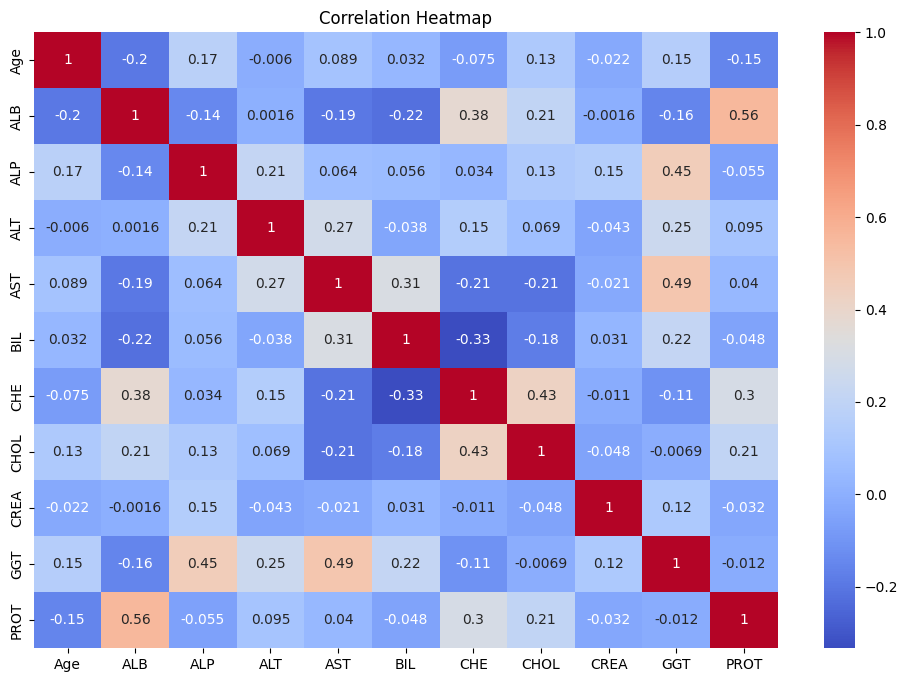

In [23]:
# Correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

In [24]:

# Display min and max for each column
min_values = df.min(numeric_only=True)
max_values = df.max(numeric_only=True)
print("Minimum values:\n", min_values)
print("\nMaximum values:\n", max_values)

Minimum values:
 Age     19.00
ALB     14.90
ALP     11.30
ALT      0.90
AST     10.60
BIL      0.80
CHE      1.42
CHOL     1.43
CREA     8.00
GGT      4.50
PROT    44.80
dtype: float64

Maximum values:
 Age       77.00
ALB       82.20
ALP      416.60
ALT      325.30
AST      324.00
BIL      254.00
CHE       16.41
CHOL       9.67
CREA    1079.10
GGT      650.90
PROT      90.00
dtype: float64


In [25]:
# Fill missing values with median
df.fillna(df.median(numeric_only=True), inplace=True)

# Encode categorical data
df['Sex'] = df['Sex'].map({'m': 0, 'f': 1})
le = LabelEncoder()
df['Target'] = le.fit_transform(df['Category'])

# Drop original label
X = df.drop(columns=['Category', 'Target'])
y = df['Target']

C:\Users\Subhasri\AppData\Local\Temp\ipykernel_43268\1631513441.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=feat_imp.head(10), x='Importance', y='Feature', palette='viridis')


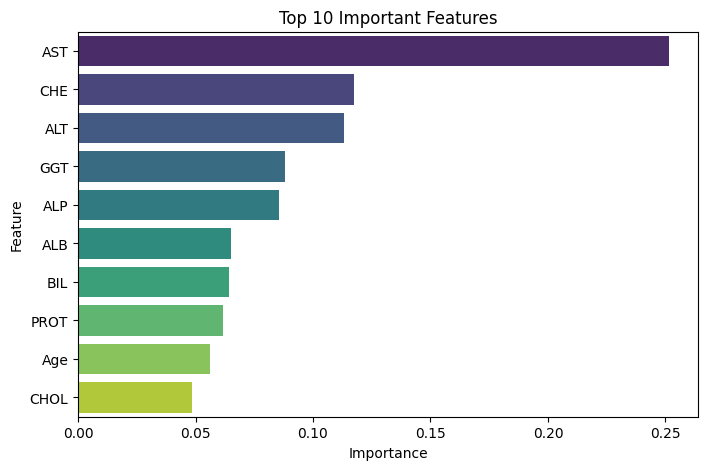

    AST    CHE   ALT   GGT   ALP   ALB   BIL  PROT
0  22.1   6.93   7.7  12.1  52.5  38.5   7.5  69.0
1  24.7  11.17  18.0  15.6  70.3  38.5   3.9  76.5
2  52.6   8.84  36.2  33.2  74.7  46.9   6.1  79.3
3  22.6   7.33  30.6  33.8  52.0  43.2  18.9  75.7
4  24.8   9.15  32.6  29.9  74.1  39.2   9.6  68.7


In [26]:
# Scale features for feature selection
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Random Forest for feature importance
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_scaled, y)

importances = rf_model.feature_importances_
feature_names = X.columns

feat_imp = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Plot top 10
plt.figure(figsize=(8, 5))
sns.barplot(data=feat_imp.head(10), x='Importance', y='Feature', palette='viridis')
plt.title("Top 10 Important Features")
plt.show()

# Select top 8 features
top_features = feat_imp['Feature'].head(8).tolist()
X_selected = df[top_features]
print(X_selected.head())

In [27]:

# Scale selected features
X_scaled_final = scaler.fit_transform(X_selected)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled_final, y, test_size=0.2, stratify=y, random_state=42)


Decision Tree Results:
Accuracy: 0.9105691056910569
              precision    recall  f1-score   support

           0       0.99      0.97      0.98       107
           1       0.00      0.00      0.00         1
           2       0.43      0.60      0.50         5
           3       0.25      0.25      0.25         4
           4       0.67      0.67      0.67         6

    accuracy                           0.91       123
   macro avg       0.47      0.50      0.48       123
weighted avg       0.92      0.91      0.91       123



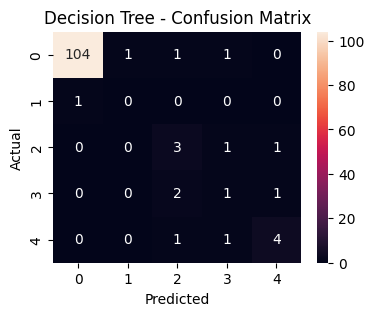

In [28]:
`#` Scale selected features
X_scaled_final = scaler.fit_transform(X_selected)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled_final, y, test_size=0.2, stratify=y, random_state=42)
results=set()
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred, average='weighted')
rec = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

results.add(("Decision Tree", acc, prec, rec, f1))

print(f"\nDecision Tree Results:")
print("Accuracy:", acc)
print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(4, 3))
sns.heatmap(cm, annot=True, fmt='d')
plt.title("Decision Tree - Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


Logistic Regression Results:
Accuracy: 0.943089430894309
              precision    recall  f1-score   support

           0       0.96      1.00      0.98       107
           1       0.00      0.00      0.00         1
           2       0.60      0.60      0.60         5
           3       0.50      0.25      0.33         4
           4       1.00      0.83      0.91         6

    accuracy                           0.94       123
   macro avg       0.61      0.54      0.56       123
weighted avg       0.93      0.94      0.93       123



c:\Hepatitis C prediction\.venv\lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Hepatitis C prediction\.venv\lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Hepatitis C prediction\.venv\lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Hepa

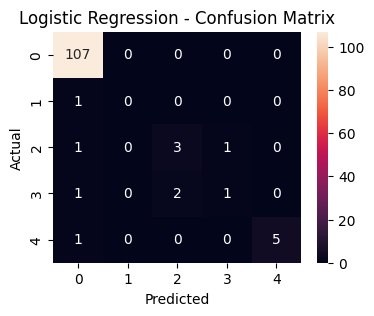

In [29]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred, average='weighted')
rec = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

results.add(("Logistic Regression", acc, prec, rec, f1))

print(f"\nLogistic Regression Results:")
print("Accuracy:", acc)
print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(4, 3))
sns.heatmap(cm, annot=True, fmt='d')
plt.title("Logistic Regression - Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

c:\Hepatitis C prediction\.venv\lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Hepatitis C prediction\.venv\lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Hepatitis C prediction\.venv\lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Hepa


Random Forest Results:
Accuracy: 0.9349593495934959
              precision    recall  f1-score   support

           0       0.96      1.00      0.98       107
           1       0.00      0.00      0.00         1
           2       0.33      0.20      0.25         5
           3       0.50      0.50      0.50         4
           4       1.00      0.83      0.91         6

    accuracy                           0.93       123
   macro avg       0.56      0.51      0.53       123
weighted avg       0.92      0.93      0.92       123



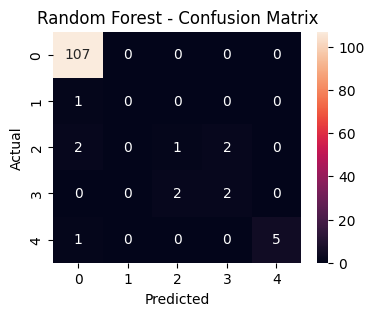

In [30]:
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred, average='weighted')
rec = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

results.add(("Random Forest", acc, prec, rec, f1))

print(f"\nRandom Forest Results:")
print("Accuracy:", acc)
print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(4, 3))
sns.heatmap(cm, annot=True, fmt='d')
plt.title("Random Forest - Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


Gradient Boosting Results:
Accuracy: 0.943089430894309
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       107
           1       0.00      0.00      0.00         1
           2       0.50      0.40      0.44         5
           3       0.50      0.50      0.50         4
           4       0.83      0.83      0.83         6

    accuracy                           0.94       123
   macro avg       0.56      0.55      0.55       123
weighted avg       0.93      0.94      0.94       123



c:\Hepatitis C prediction\.venv\lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Hepatitis C prediction\.venv\lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Hepatitis C prediction\.venv\lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Hepa

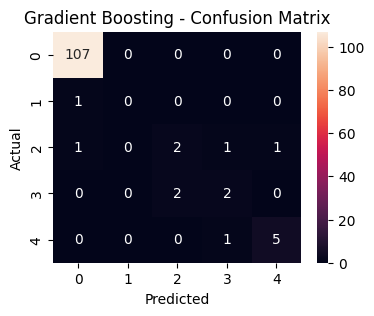

In [31]:
model = GradientBoostingClassifier(random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred, average='weighted')
rec = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

results.add(("Gradient Boosting", acc, prec, rec, f1))

print(f"\nGradient Boosting Results:")
print("Accuracy:", acc)
print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(4, 3))
sns.heatmap(cm, annot=True, fmt='d')
plt.title("Gradient Boosting - Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [32]:
# Create comparison DataFrame
results_df = pd.DataFrame(results, columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1-Score'])
print("\n Model Comparison:")
print(results_df.sort_values(by='Accuracy', ascending=False))


 Model Comparison:
                 Model  Accuracy  Precision    Recall  F1-Score
0    Gradient Boosting  0.943089   0.931193  0.943089  0.936841
1  Logistic Regression  0.943089   0.928001  0.943089  0.933533
2        Random Forest  0.934959   0.917161  0.934959  0.924726
3        Decision Tree  0.910569   0.919706  0.910569  0.914481


In [33]:
# Define parameter grid for tuning
param_grid = {
    'max_depth': [3, 4, 5],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize model
rfc_model = GradientBoostingClassifier(random_state=42)

# GridSearchCV setup
grid_search = GridSearchCV(estimator=rfc_model, param_grid=param_grid,
                           cv=5, scoring='accuracy', n_jobs=1, verbose=1)

# Fit on training data
grid_search.fit(X_train, y_train)

# Best parameters
print("Best Parameters:", grid_search.best_params_)
print("Best CV Score:", grid_search.best_score_)

Fitting 5 folds for each of 27 candidates, totalling 135 fits
Best Parameters: {'max_depth': 4, 'min_samples_leaf': 1, 'min_samples_split': 2}
Best CV Score: 0.9349824778396207


 Final Evaluation on Test Set:
Accuracy: 0.9349593495934959
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       107
           1       0.00      0.00      0.00         1
           2       0.40      0.40      0.40         5
           3       0.50      0.50      0.50         4
           4       0.80      0.67      0.73         6

    accuracy                           0.93       123
   macro avg       0.54      0.51      0.52       123
weighted avg       0.93      0.93      0.93       123



c:\Hepatitis C prediction\.venv\lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Hepatitis C prediction\.venv\lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Hepatitis C prediction\.venv\lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Hepa

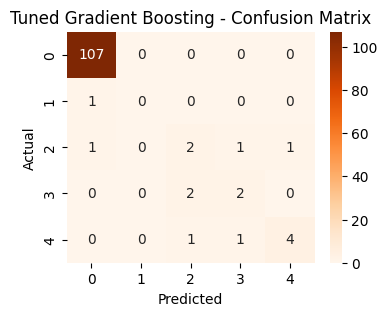

In [34]:
# Predict using best model
best_gb = grid_search.best_estimator_
y_pred_best = best_gb.predict(X_test)

acc = accuracy_score(y_test, y_pred_best)
prec = precision_score(y_test, y_pred_best, average='weighted')
rec = recall_score(y_test, y_pred_best, average='weighted')
f1 = f1_score(y_test, y_pred_best, average='weighted')

results.add(("Hypretuned_Gradient_Boosting", acc, prec, rec, f1))

# Evaluate
print(" Final Evaluation on Test Set:")
print("Accuracy:",acc)
print(classification_report(y_test, y_pred_best))

# Confusion Matrix
plt.figure(figsize=(4, 3))
sns.heatmap(confusion_matrix(y_test, y_pred_best), annot=True, fmt='d', cmap='Oranges')
plt.title("Tuned Gradient Boosting - Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

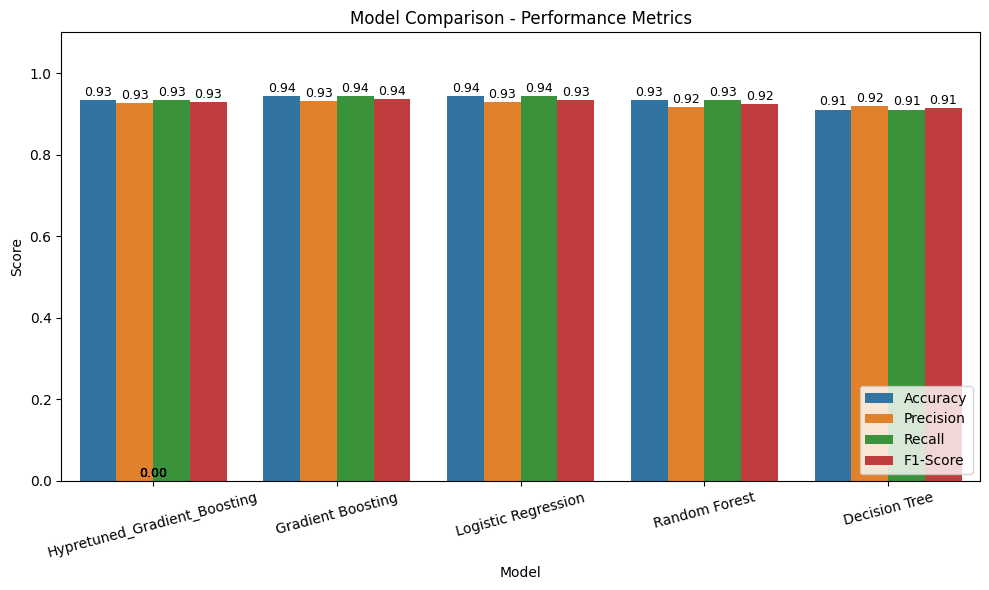

In [35]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create DataFrame
results_df = pd.DataFrame(results, columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1-Score'])

# Melt the DataFrame for plotting
results_melted = results_df.melt(id_vars='Model', var_name='Metric', value_name='Score')

# Plot
plt.figure(figsize=(10, 6))
ax = sns.barplot(data=results_melted, x='Model', y='Score', hue='Metric')

# Add values on top of bars
for p in ax.patches:
    height = p.get_height()
    ax.text(
        p.get_x() + p.get_width() / 2.,
        height + 0.01,
        f'{height:.2f}',
        ha="center", fontsize=9
    )

plt.title('Model Comparison - Performance Metrics')
plt.ylabel('Score')
plt.ylim(0, 1.1)
plt.xticks(rotation=15)
plt.legend(loc='lower right')
plt.tight_layout()
plt.show()

In [36]:
import joblib

joblib.dump(best_gb, "model.pkl")
joblib.dump(scaler, "scaler.pkl")
joblib.dump(le, "label_encoder.pkl")

['label_encoder.pkl']

In [41]:
print(top_features)

['AGE', 'AST', 'CHE', 'ALT', 'ALP', 'ALB', 'BIL', 'GGT']


In [37]:
print(df.columns)

Index(['Category', 'Age', 'Sex', 'ALB', 'ALP', 'ALT', 'AST', 'BIL', 'CHE',
       'CHOL', 'CREA', 'GGT', 'PROT', 'Target'],
      dtype='object')


In [44]:
print(dict(zip(le.classes_, range(len(le.classes_)))))

{'0=Blood Donor': 0, '0s=suspect Blood Donor': 1, '1=Hepatitis': 2, '2=Fibrosis': 3, '3=Cirrhosis': 4}


In [43]:
import joblib

le = joblib.load("label_encoder.pkl")

print("Number of classes:", len(le.classes_))
print("Classes:", le.classes_)

Number of classes: 5
Classes: ['0=Blood Donor' '0s=suspect Blood Donor' '1=Hepatitis' '2=Fibrosis'
 '3=Cirrhosis']


In [42]:
import joblib
import numpy as np

# =========================
# LOAD TRAINED FILES
# =========================

model_path = r"C:\Hepatitis C prediction\Hepatitis-C-Prediction\model.pkl"
scaler_path = r"C:\Hepatitis C prediction\Hepatitis-C-Prediction\scaler.pkl"
encoder_path = r"C:\Hepatitis C prediction\Hepatitis-C-Prediction\label_encoder.pkl"

loaded_model = joblib.load(model_path)
loaded_scaler = joblib.load(scaler_path)
loaded_le = joblib.load(encoder_path)


# =========================
# FEATURE ORDER (MUST MATCH TRAINING)
# =========================
top_features = [
  'AGE','AST','CHE','ALT','ALP','ALB','BIL','GGT'
]   


# =========================
# USER INPUT
# =========================
print("\nEnter Patient Details:\n")

user_inputs = []
for feature in top_features:
    val = float(input(f"{feature}: "))
    user_inputs.append(val)


# =========================
# PREPROCESS INPUT
# =========================
input_array = np.array(user_inputs).reshape(1, -1)
input_scaled = loaded_scaler.transform(input_array)


# =========================
# PREDICTION
# =========================
prediction = loaded_model.predict(input_scaled)


# =========================
# DECODE LABEL
# =========================
predicted_class = loaded_le.inverse_transform(prediction)

print("\n==========================")
print("Prediction Result:", predicted_class[0])
print("==========================")


Enter Patient Details:




Prediction Result: 1=Hepatitis


c:\Hepatitis C prediction\.venv\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
